<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/main/12_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! rm Colegio_Invisible -r

In [1]:
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git

Cloning into 'Colegio_Invisible'...
remote: Enumerating objects: 1044, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 1044 (delta 34), reused 0 (delta 0), pack-reused 990
Receiving objects: 100% (1044/1044), 78.73 MiB | 34.07 MiB/s, done.
Resolving deltas: 100% (715/715), done.


for an image...there are pixels

each pixel has 3,4 values (Red Green Blue and sometime Alpha)

those numbers are...1 byte...0 to 255

In [279]:
from PIL import Image
import numpy as np

what can we put into blockchain...
Op_Return
80 bytes and we will use 64 bytes for image data

each byte is made up of 8 binary values 1/0 called bits

64 bytes = 64*8...512 bits

We want to put image in single block

PROPOSAL:

16x16 image = 256 pixels

only get to use 2 bits per pixel

- 0,0  0 
- 0,1  64
- 1,0  128
- 1,1  192

1 byte [ , , , , , , , ]

1 byte can tell us color of 4 pixels
each one taking up 2 bits

In [3]:
!ls Colegio_Invisible/img

Apollo_Slays_Python_1853.jpeg  colegio_invisible.jpeg  rum_1.jpeg
asymmetric.png		       hg_cry.jpeg	       rum_2.jpeg
bab_crop.jpeg		       hg_drop.jpeg	       rum_3.jpeg
barb_1.jpeg		       hg_hide.jpeg	       rum_4.jpeg
barb_2.jpeg		       hg_house.jpeg	       rum_5.jpeg
barb_3.jpeg		       hg_invite.jpeg	       rum_6.jpeg
barb_4.jpeg		       hg_rough.png	       rum_7.jpeg
barb_5.jpeg		       hg_xmas.jpeg	       rump_final.jpeg
barb_6.jpeg		       mask.png		       signature.png
barb_7.jpeg		       prv_pub_addr.png        stego.png
cat.png			       PubKeyToAddr.png        symmetric.png
clavis.jpeg		       rum_0.jpeg	       zomnd.png


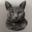

In [4]:
stego_image=Image.open('Colegio_Invisible/img/cat.png')
stego_image=stego_image.resize((32,32))
stego_image

In [5]:
type(stego_image)

PIL.Image.Image

In [6]:
stego_array = np.array(stego_image)
stego_array

array([[[226, 223, 218, 255],
        [224, 220, 215, 255],
        [221, 218, 212, 255],
        ...,
        [204, 198, 192, 255],
        [201, 196, 189, 255],
        [200, 194, 188, 255]],

       [[219, 216, 210, 255],
        [217, 214, 208, 255],
        [214, 211, 205, 255],
        ...,
        [202, 197, 190, 255],
        [200, 195, 188, 255],
        [198, 193, 186, 255]],

       [[209, 206, 199, 255],
        [207, 204, 197, 255],
        [205, 201, 195, 255],
        ...,
        [200, 194, 187, 255],
        [199, 193, 186, 255],
        [197, 191, 185, 255]],

       ...,

       [[135, 127, 120, 255],
        [133, 125, 118, 255],
        [130, 122, 116, 255],
        ...,
        [162, 154, 146, 255],
        [162, 155, 147, 255],
        [163, 156, 148, 255]],

       [[134, 126, 120, 255],
        [132, 124, 118, 255],
        [129, 122, 115, 255],
        ...,
        [161, 153, 145, 255],
        [162, 154, 146, 255],
        [162, 155, 147, 255]],

       [[133

**`uint8`** stands for unsigned 8-bit integer
- 8 binary 1/0 values
- that is one byte
- a number from 0-255
- two hex values like ff

In [7]:
2**8

256

In [8]:
stego_array.dtype

dtype('uint8')

In [9]:
stego_array.shape

(32, 32, 4)

In [10]:
stego_array[:,:,:3]

array([[[226, 223, 218],
        [224, 220, 215],
        [221, 218, 212],
        ...,
        [204, 198, 192],
        [201, 196, 189],
        [200, 194, 188]],

       [[219, 216, 210],
        [217, 214, 208],
        [214, 211, 205],
        ...,
        [202, 197, 190],
        [200, 195, 188],
        [198, 193, 186]],

       [[209, 206, 199],
        [207, 204, 197],
        [205, 201, 195],
        ...,
        [200, 194, 187],
        [199, 193, 186],
        [197, 191, 185]],

       ...,

       [[135, 127, 120],
        [133, 125, 118],
        [130, 122, 116],
        ...,
        [162, 154, 146],
        [162, 155, 147],
        [163, 156, 148]],

       [[134, 126, 120],
        [132, 124, 118],
        [129, 122, 115],
        ...,
        [161, 153, 145],
        [162, 154, 146],
        [162, 155, 147]],

       [[133, 126, 119],
        [131, 124, 117],
        [129, 122, 115],
        ...,
        [160, 152, 144],
        [161, 153, 145],
        [163, 155, 147]]

In [11]:
def grey_imgarr(imgarr):
  return imgarr[:,:,:3].mean(axis=2).astype('uint8')

In [12]:
stego_array_grey=stego_array[:,:,:3].mean(axis=2).astype('uint8')
stego_array_grey.shape,stego_array_grey.dtype

((32, 32), dtype('uint8'))

In [13]:
stego_array_grey

array([[222, 219, 217, ..., 198, 195, 194],
       [215, 213, 210, ..., 196, 194, 192],
       [204, 202, 200, ..., 193, 192, 191],
       ...,
       [127, 125, 122, ..., 154, 154, 155],
       [126, 124, 122, ..., 153, 154, 154],
       [126, 124, 122, ..., 152, 153, 155]], dtype=uint8)

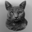

In [14]:
stego_image_grey = Image.fromarray(stego_array_grey)
stego_image_grey

In [15]:
def int_2_bit_array(num):
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(8-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

In [16]:
int_2_bit_array(255)

array([1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [17]:
int_2_bit_array(2)

array([0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [18]:
int_2_bit_array(64)

array([0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [19]:
int_2_bit_array(65)

array([0, 1, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [20]:
int_2_bit_array(68)

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [21]:
int_2_bit_array(1)

array([0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [22]:
int_2_bit_array(0)

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Goal:

- take image of 256 bytes and reduce each byte to 2 bit in form of 2 element array
- turn that all into 512 bits
- turn 512 bits into 64 bytes

# Generalize Standard For Images (MxN)

If we create a standard for the header that describes the data stored then we can choose the following paramenters:

- length
- width
- color dim 
- color bit count

In total the number of bits is the product of all the parameters

## Greyscale Image 

## RGB Image

## Two Channel Color Standard

## Four Channel

## General Color Dim



In [ ]:
message_2_bit_array(message,mode=None)
bitarray2imgarr(barrs,imgshape=(16,16),bit=2,color=1)
Image.fromarray(bitarray2imgarr(bitarray,imgshape=dims,bit=bit,color=1).squeeze())


In [23]:
def grey_imgarr(imgarr):
  return imgarr[:,:,:3].mean(axis=2).astype('uint8')

def message_2_bit_array(message,mode=None):
    '''This function takes in a message as string, bytestring or hextring.
    If hexstring input the set mode='hex' '''
    if type(message)==bytes:
        hex_str=message.hex()
    elif (type(message)==str):
        if mode not in ('hex','hexstring'):
            hex_str=message.encode().hex()
        else:
            hex_str=message
    else:
        print('fix the input and mode')
        return None
    
    num=int('0x'+hex_str,base=16)
    byte_len=(len(hex_str)+1)//2
    bit_len=byte_len*8
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(bit_len-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

def bit_array_2_byte_str(bit_array):
    '''Convert bit array to a bytestring'''
    bit_list=[ str(bit) for bit in bit_array]
    bin_str='0b'+(''.join(bit_list))
    num=int(bin_str,base=2)
    return num.to_bytes(len(bit_array)//8,'big')

def bit_array_2_hex_str(bit_array):  
    '''Convert a bit array to a hexstring'''
    return bit_array_2_byte_str(bit_array).hex()

def bit_array_2_str(bit_array,encoding='utf-8'):
    '''Convert a bit array to a string'''
    return bit_array_2_byte_str(bit_array).decode(encoding)

def int2bitarray(x,bit=8):
  return message_2_bit_array(hex(x)[2:],mode='hex')[:bit]

def bitarray2int(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return (b_arr*scales).sum()

def imgarr2bitarray(imgarr,bit=8):
  return np.array([ int2bitarray(it,bit) for it in imgarr.reshape(-1)]).reshape(-1)

def bitarray2imgarr(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr
 
def bitarray2imgarr_scale(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int_scale(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr

In [24]:
class bitimage():

  def __init__(self,imgpath,dims=(16,16),bit=2,color=1):
    from PIL import Image
    self.color=color
    self.bit=bit
    self.dims=list(dims)
    self.img_og=Image.open(imgpath)
    self.img_resize=self.img_og.resize(dims)
    self.grey=grey_imgarr(np.array(self.img_resize))
    self.img_grey=Image.fromarray(self.grey)
    self.bitarray=imgarr2bitarray(self.grey,bit)
    self.bitarray_color=imgarr2bitarray(np.array(self.img_resize)[:,:,:color],bit)
    self.newimg=Image.fromarray(bitarray2imgarr(self.bitarray,imgshape=dims,bit=bit,color=1).squeeze())
    self.newimg_color=Image.fromarray(bitarray2imgarr(self.bitarray_color,imgshape=dims,bit=bit,color=3).squeeze())
    self.bytestring=bit_array_2_byte_str(self.bitarray)
    self.bytestring_color=bit_array_2_byte_str(self.bitarray_color)




In [25]:
!ls Colegio_Invisible/img

Apollo_Slays_Python_1853.jpeg  colegio_invisible.jpeg  rum_1.jpeg
asymmetric.png		       hg_cry.jpeg	       rum_2.jpeg
bab_crop.jpeg		       hg_drop.jpeg	       rum_3.jpeg
barb_1.jpeg		       hg_hide.jpeg	       rum_4.jpeg
barb_2.jpeg		       hg_house.jpeg	       rum_5.jpeg
barb_3.jpeg		       hg_invite.jpeg	       rum_6.jpeg
barb_4.jpeg		       hg_rough.png	       rum_7.jpeg
barb_5.jpeg		       hg_xmas.jpeg	       rump_final.jpeg
barb_6.jpeg		       mask.png		       signature.png
barb_7.jpeg		       prv_pub_addr.png        stego.png
cat.png			       PubKeyToAddr.png        symmetric.png
clavis.jpeg		       rum_0.jpeg	       zomnd.png


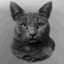

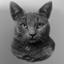

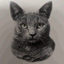

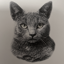

(32, 96)

In [250]:
bimg=bitimage('Colegio_Invisible/img/cat.png',dims=(64,64),bit=5,color=3)
display(bimg.newimg)
display(bimg.img_grey)
display(bimg.newimg_color)
display(bimg.img_resize)
len(bimg.bytestring)//80,len(bimg.bytestring_color)//80

In [36]:
import hashlib 

message=bimg.bytestring
H=hashlib.sha256(message)

n=80
chunks = [message[i:i+n] for i in range(0, len(message), n)]

print(len(chunks))
print(len(chunks[-1]))

print(H.digest())

32
80
b'\xd1\x9c\x04\xdab\x05\x01X@]\xc1\xc1\xe7@\x9d\xd2\xe85aAl\xe0P\xbf\x91\xeb\xb7w\xb3\xa5P\x13'


In [66]:
header=b'\xc1\xdd\x00\x01\x03\xff\x20\x20\x05'
text='Sparkle\nMagical Cat\n✨💜Fovever💜✨\n'.encode()
header+text

b'\xc1\xdd\x00\x01\x03\xff  \x05Sparkle\nMagical Cat\n\xe2\x9c\xa8\xf0\x9f\x92\x9cFovever\xf0\x9f\x92\x9c\xe2\x9c\xa8\n'

In [67]:
package=[header+text]+chunks
package

[b'\xc1\xdd\x00\x01\x03\xff  \x05Sparkle\nMagical Cat\n\xe2\x9c\xa8\xf0\x9f\x92\x9cFovever\xf0\x9f\x92\x9c\xe2\x9c\xa8\n',
 b'\xe6\xf7\xbd\xef{\xde\xf7\xad\xefZ\xd6\xb5\xadkZ\xd6\xb5\xadkZ\xd6\xb5\xadkZ\xd6\xb5\xadg9\xd6s\x9c\xe79\xce1\x8cc\x18\xde\xf7\xbd\xebZ\xd6\xb1Z\xe3Z\xd6\xb5\xadkZ\xd6\xb5\xadkZ\xd6\xb5\xadkZ\xces\x9c\xe7Y\xc4\xe3,g9\xc61\x8cc\x18',
 b"\xde\xf5\xadkZ\xd6'\x08Bw\xd6s\x9c\xe79\xces\x9c\xe79\xces\x9c\xe79\xces\x9c\xe6\xf4\x83Z\xcbg8\xc61\x8cc\x18\xd6\xb5\xadg9\xcd\xe2\xe79\xaf\x9es\x9c\xe79\xces\x9c\xe79\xces\x9c\xe79\xces\x9cI\xccZ\x92\xaa\xe7\x18\xc61\x8cc\x18",
 b'\xd6s\x9c\xe79\xcd\x9e\xc6\xb1\xacdq\x8cc\x18\xc61\x8cc\x19\xces\x9c\xe79\xces\x87\xb1kR\x90\x9a\xe7\x18\xc61\x8cc\x17\xces\x8cc\x18\xc5Z\xb6\xb5\x8bZ\x9f|c\x18\xc61\x8cc\x18\xc61\x8cc\x18\xc6,\xd5\xa9lRP\x9ac\x18\xc61\x8b\xde\xf7',
 b'\xc61\x8b\xde\xf7\xbd\x18\xa61IJ\x12\xeb^\xf7\xbd\xef{\xde\xf7\xbd\xef{\xde\xf7\xc5\x98\x951\xadQ\xce\x9ac\x18\xc6/{\xde\xf7\xbd\xef{\xde\xf7\xbc\xd6t\xad\x8cJ\x10vV\xd6

In [69]:
! pip install eciespy eth_keys cryptos qrcode base58 

In [71]:
import pandas as pd
from cryptos.py3specials import safe_hexlify, from_string_to_bytes, from_int_to_byte, from_string_to_bytes
from cryptos import serialize,deserialize

import hashlib
import os
import getpass
import ecies
import eth_keys
import cryptos
import qrcode
import base58
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def import_privKey(privkey_filepath,password=None):
    if password==None:
        password = getpass.getpass("Input password for decrypting keyfile: ")
    password=password.encode()
    f=open(privkey_filepath,'rb')
    decrypted_bytes=ecies.aes_decrypt(key=hashlib.sha256(password).digest(),cipher_text=f.read())
    privKey=eth_keys.keys.PrivateKey(decrypted_bytes)
    return privKey

def import_pubKey(pubkey_filepath):
    f=open(pubkey_filepath,'rb')
    privKey=eth_keys.keys.PublicKey(f.read())
    return privKey

def import_addr(addr_filepath):
    return open(addr_filepath,'rb').read().decode()

def only_conf(utxos):
    return [utxo for utxo in utxos
            if doge.fetchtx(utxo['output'].split(':')[0])['confirmations']>0]

def mk_opreturn(msg, rawtx=None, json=0):
    
    def op_push(data):
        if type(data) == bytes:
            bytedata=data
        else:
            bytedata=data.encode()
        import struct
        if len(data) < 0x4c:
            return from_int_to_byte(len(bytedata)) + bytedata
        elif len(data) < 0xff:
            return from_int_to_byte(76) + struct.pack('<B', len(bytedata)) + bytedata
        elif len(data) < 0xffff:
            return from_int_to_byte(77) + struct.pack('<H', len(bytedata)) + bytedata
        elif len(data) < 0xffffffff:
            return from_int_to_byte(78) + struct.pack('<I', len(bytedata)) + bytedata
        else: raise Exception("Input data error. Rawtx must be hex chars" \
                            + "0xffffffff > len(data) > 0")

    orhex = safe_hexlify(b'\x6a' + op_push(msg))
    orjson = {'script' : orhex, 'value' : 0}
    if rawtx is not None:
        try:
            txo = deserialize(rawtx)
            if not 'outs' in txo.keys(): raise Exception("OP_Return cannot be the sole output!")
            txo['outs'].append(orjson)
            newrawtx = serialize(txo)
            return newrawtx
        except Exception as E:
            print(E)
            print(type(E))
            raise Exception("Raw Tx Error!")
    return orhex if not json else orjson

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
! cp drive/MyDrive/cinv/llaves.zip llaves.zip 
! unzip llaves.zip

Archive:  llaves.zip
   creating: llaves/
 extracting: llaves/mi_addr.bin      
 extracting: llaves/mi_addr.png      
 extracting: llaves/mi_pub.bin       
 extracting: llaves/mi_prv.enc       


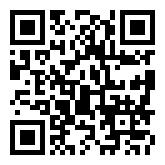

'0x7c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5'

'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX'

In [74]:
from IPython.display import Image
qr=Image('llaves/mi_addr.png')

privKey=import_privKey('llaves/mi_prv.enc','')
pub=import_pubKey('llaves/mi_pub.bin').to_hex()
addr=import_addr('llaves/mi_addr.bin')

display(qr)
display(pub)
display(addr)

In [84]:
doge=cryptos.Doge()
#addy=doge.privtoaddr(privkeyhex)
doge_unspents=only_conf( doge.unspent(addr) )
doge_unspent_total=sum([unspent['value'] for unspent in doge_unspents])
doge_unspent_total/10**8

165.0

In [85]:
tip=8_00_000_000
available=doge_unspent_total-tip
n=len(package)
gift=int(available/n)
outputs=[{'value':gift , 'address': addr} for i in range(33)]
setup_tx=doge.mktx(doge_unspents,outputs)

In [86]:
doge.signall(setup_tx,privKey.to_hex()[2:])

'01000000022f7e9d2970c6a4f6baa26ecb61df7e2c82ad4f6a72bd5d66745d182e75df2782000000008b483045022100bbaa02298c147eb7ac3430365adf58acca55e1d0d4ea481383c81c478fb3842a0220719eee2ed36f745b3cf0169bd6535d968da022c840c13e79eaf9e4ec3b6394320141047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5ffffffff8c5ee4eb037a5400e40eecadaedf44efc7a64ecd614e03d2028427ae3c21ae4c000000008a47304402205b6f2e1697d31a14aac4823af75950fec3da411670b2b4448255e1834df6e16502203915681a91ea5ed745ce57f7c8e20d20af9f35a3797119669f3d54e817b77e130141047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5ffffffff21077c5b1c000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac077c5b1c000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac077c5b1c000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac077c5b1c000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f8

In [90]:
len(cryptos.serialize(setup_tx))/2

1491.0

In [88]:
doge.pushtx(cryptos.serialize(setup_tx))

{'data': {'network': 'DOGE',
  'txid': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7'},
 'status': 'success'}

In [89]:
doge.fetchtx('a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7')

{'blockhash': '2813436a75e902fb9992fce65f1376484daa369ebe7bd04a04d361464dc3142d',
 'confirmations': 1,
 'inputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': '8227df752e185d74665dbd726a4fad822c7edf61cb6ea2baf6a4c670299d7e2f'},
   'input_no': 0,
   'script': '3045022100bbaa02298c147eb7ac3430365adf58acca55e1d0d4ea481383c81c478fb3842a0220719eee2ed36f745b3cf0169bd6535d968da022c840c13e79eaf9e4ec3b63943201 047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5',
   'sequence': 4294967295,
   'type': 'pubkeyhash',
   'value': '15.00000000',
   'witness': None},
  {'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': '4cae213cae278402d2034e61cd4ea6c7ef44dfaeadec0ee400547a03ebe45e8c'},
   'input_no': 1,
   'script': '304402205b6f2e1697d31a14aac4823af75950fec3da411670b2b4448255e1834df6e16502203915681a91ea5ed745ce57f7c8e20d20a

In [92]:
sparkle_unspents=only_conf( doge.unspent(addr) )
sparkle_unspents

[{'output': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7:0',
  'value': 475757575},
 {'output': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7:1',
  'value': 475757575},
 {'output': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7:2',
  'value': 475757575},
 {'output': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7:3',
  'value': 475757575},
 {'output': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7:4',
  'value': 475757575},
 {'output': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7:5',
  'value': 475757575},
 {'output': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7:6',
  'value': 475757575},
 {'output': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7:7',
  'value': 475757575},
 {'output': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7:8',
  'value': 475757575},
 {'output': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb00

In [97]:
input_monolists=[ [elem] for elem in sparkle_unspents]

In [98]:
write_tip=2_00_000_000
outputs=[ [{'value':elem['value']-write_tip , 'address': addr}] for elem in sparkle_unspents]

In [99]:
outputs

[[{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 275757575}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8Q

        doge_serial_tx=cryptos.serialize(doge_tx)
        doge_inscribed_serial_tx=mk_opreturn( op_return , doge_serial_tx)
        doge_inscribed_tx=cryptos.deserialize(doge_inscribed_serial_tx)
        doge_signed_inscribed_tx=doge.signall(doge_inscribed_tx,privkeyhex)
        broadcast_doge_signed_inscribed_tx=doge.pushtx(doge_signed_inscribed_tx)

In [101]:
txns=[ doge.mktx(input_monolists[i],outputs[i]) for i in range(33)]

In [102]:
serial_txns=[cryptos.serialize(tx) for tx in txns]

In [103]:
inscribed_serial_txs=[mk_opreturn( package[i] , serial_txns[i]) for i in range(33)]

In [104]:
inscribed_serial_txs

['0100000001a7bd48001fb7867f23939000fb5c3d819c5461d8fc34b768e3eacee1ebf2e9a20000000000ffffffff0207ba6f10000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac0000000000000000356a33c1dd000103ff202005537061726b6c650a4d61676963616c204361740ae29ca8f09f929c466f7665766572f09f929ce29ca80a00000000',
 '0100000001a7bd48001fb7867f23939000fb5c3d819c5461d8fc34b768e3eacee1ebf2e9a20100000000ffffffff0207ba6f10000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac0000000000000000536a4c50e6f7bdef7bdef7adef5ad6b5ad6b5ad6b5ad6b5ad6b5ad6b5ad6b5ad6739d6739ce739ce318c6318def7bdeb5ad6b15ae35ad6b5ad6b5ad6b5ad6b5ad6b5ad6b5ace739ce759c4e32c6739c6318c631800000000',
 '0100000001a7bd48001fb7867f23939000fb5c3d819c5461d8fc34b768e3eacee1ebf2e9a20200000000ffffffff0207ba6f10000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac0000000000000000536a4c50def5ad6b5ad627084277d6739ce739ce739ce739ce739ce739ce739ce6f4835acb6738c6318c6318d6b5ad6739cde2e739af9e739ce739ce739ce739ce739ce739ce739c49cc5a92aae718c631

In [106]:
inscribed_txs=[cryptos.deserialize(elem) for elem in inscribed_serial_txs]

In [107]:
signed_inscribed_txs=[doge.signall(elem,privKey.to_hex()[2:]) for elem in inscribed_txs]

In [108]:
broadcasts=[doge.pushtx(elem) for elem in signed_inscribed_txs]
broadcasts

[{'data': {'network': 'DOGE',
   'txid': 'b07a93efa3e5f989c887843b840a211e7a8cabf60ff4865aef09ee3b9abd0c75'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '763f1e7c3c6860247ee8ef78bed06d05d8953baec15c10ce74f446e9eb2c36bc'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'f4f5d5d037b695ed627be22837d9490f7f1626e0e09625208e91c5bc8a8724c8'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'b4cab2d7bec061cc590cf6cb076856ad4d6a42ff407c76e0d9bbc46359ed3a8a'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '9ce3372684feef120c1bd9e1c76901542446b8a2babcd859d7ce1acfa1271226'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '0a9a3f99540c34113a8ef23be87585a21d154239aeaf8eeafc74a7fb6f86098f'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'a0dca63e61ad0dd441ec23623bf78f42d725ad82a6d204a12347e5c069f2d41b'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'ae0ffd681911b4096671

In [115]:
[doge.fetchtx(broadcast['data']['txid'])['confirmations'] for broadcast in broadcasts]

[67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67]

In [126]:
sparkle_txn=sparkle_unspents[0]['output'].split(':')[0]
sparkle_txn

'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7'

In [154]:
sparkle_txn_info=doge.fetchtx(sparkle_txn)
sparkle_txn_info

{'blockhash': '2813436a75e902fb9992fce65f1376484daa369ebe7bd04a04d361464dc3142d',
 'confirmations': 132,
 'inputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': '8227df752e185d74665dbd726a4fad822c7edf61cb6ea2baf6a4c670299d7e2f'},
   'input_no': 0,
   'script': '3045022100bbaa02298c147eb7ac3430365adf58acca55e1d0d4ea481383c81c478fb3842a0220719eee2ed36f745b3cf0169bd6535d968da022c840c13e79eaf9e4ec3b63943201 047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5',
   'sequence': 4294967295,
   'type': 'pubkeyhash',
   'value': '15.00000000',
   'witness': None},
  {'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': '4cae213cae278402d2034e61cd4ea6c7ef44dfaeadec0ee400547a03ebe45e8c'},
   'input_no': 1,
   'script': '304402205b6f2e1697d31a14aac4823af75950fec3da411670b2b4448255e1834df6e16502203915681a91ea5ed745ce57f7c8e20d2

In [124]:
speaker=doge.fetchtx(sparkle_txn)['outputs'][0]['address']

In [133]:
speaker_txs = doge.history(speaker)['data']['txs']

In [149]:
len(speaker_txs)

47

In [147]:
[tx for tx in speaker_txs if ('incoming' in tx.keys() ) ] 

[{'block_no': 4196535,
  'confirmations': 25243,
  'incoming': {'inputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
     'input_no': 0,
     'received_from': {'output_no': 0,
      'txid': '8a5b9ee802d70746f6a7ec213ef486d0f908951443df35a650f327b3ec07351e'}}],
   'output_no': 0,
   'req_sigs': 1,
   'script_asm': 'OP_DUP OP_HASH160 144739367df0ff8d1c61d03704298d49cf93ef3f OP_EQUALVERIFY OP_CHECKSIG',
   'script_hex': '76a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac',
   'spent': {'input_no': 0,
    'txid': 'e53bd1a35a4419ca765e14dc38f80b2ddc62473ed9147fc73f69537a6e6f9577'},
   'value': '71.00000000'},
  'outgoing': {'outputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
     'output_no': 0,
     'spent': {'input_no': 0,
      'txid': 'e53bd1a35a4419ca765e14dc38f80b2ddc62473ed9147fc73f69537a6e6f9577'},
     'value': '71.00000000'},
    {'address': 'nulldata',
     'output_no': 1,
     'spent': None,
     'value': '0.00000000'}],
   'value': '73.00000000'},
  'time': 16

In [150]:
len(speaker_txs)

47

In [151]:
speaker_txs_snd = [tx for tx in speaker_txs if 'outgoing'in tx.keys() ]
len(speaker_txs_snd)

39

In [248]:
#speaker_txs_snd

In [127]:

{'block_no': 4067956,
    'confirmations': 153809,
    'incoming': {'inputs': [{'address': 'D6iZYqUfDfnxKeXR4dYkZdLWDyF8rQ86KR',
       'input_no': 0,
       'received_from': {'output_no': 1,
        'txid': '48a90a12eb9239056874994fb3c53fc16cf3f65dd87502e681493bcf3e67ef9b'}},
      {'address': 'DLM5fZLnqbaoFnXKGBpMiyvEWpsPDVdnvp',
       'input_no': 1,
       'received_from': {'output_no': 0,
        'txid': '76ff9957e80dfc4fe3ca7fdbabd8f4a74cfd0dbe1a90250ce4a6b1639f7d8ebf'}},
      {'address': 'DQeYwshnxprWDzqiott2ticTdLAWSDqg88',
       'input_no': 2,
       'received_from': {'output_no': 1,
        'txid': '504fbb582f05afe65a8615828a614c5f9c972d29397eafe75cb71fbdd11c96cb'}}],
     'output_no': 1,
     'req_sigs': 1,
     'script_asm': 'OP_DUP OP_HASH160 144739367df0ff8d1c61d03704298d49cf93ef3f OP_EQUALVERIFY OP_CHECKSIG',
     'script_hex': '76a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac',
     'spent': {'input_no': 0,
      'txid': '4438523cd9b73e9b8ec098053d1a5eba6597b0e66108d6077df9e926b656b0d4'},
     'value': '100.00000000'},
    'time': 1642539910,
    'txid': '4bd3c08fbe5cdd8df8810408c4096602b3b0c994ff8de6748ea9bc61210ea0f7'}

{'block_no': 4067956,
 'confirmations': 153809,
 'incoming': {'inputs': [{'address': 'D6iZYqUfDfnxKeXR4dYkZdLWDyF8rQ86KR',
    'input_no': 0,
    'received_from': {'output_no': 1,
     'txid': '48a90a12eb9239056874994fb3c53fc16cf3f65dd87502e681493bcf3e67ef9b'}},
   {'address': 'DLM5fZLnqbaoFnXKGBpMiyvEWpsPDVdnvp',
    'input_no': 1,
    'received_from': {'output_no': 0,
     'txid': '76ff9957e80dfc4fe3ca7fdbabd8f4a74cfd0dbe1a90250ce4a6b1639f7d8ebf'}},
   {'address': 'DQeYwshnxprWDzqiott2ticTdLAWSDqg88',
    'input_no': 2,
    'received_from': {'output_no': 1,
     'txid': '504fbb582f05afe65a8615828a614c5f9c972d29397eafe75cb71fbdd11c96cb'}}],
  'output_no': 1,
  'req_sigs': 1,
  'script_asm': 'OP_DUP OP_HASH160 144739367df0ff8d1c61d03704298d49cf93ef3f OP_EQUALVERIFY OP_CHECKSIG',
  'script_hex': '76a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac',
  'spent': {'input_no': 0,
   'txid': '4438523cd9b73e9b8ec098053d1a5eba6597b0e66108d6077df9e926b656b0d4'},
  'value': '100.00000000'},
 'tim

In [128]:
sparkle_txn

'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7'

In [159]:
[tx for tx in speaker_txs if tx['confirmations']<10000 ]

[]

In [160]:
speaker

'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX'

In [161]:
addr

'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX'

In [166]:
doge.fetchtx('8ceaae7d6d209c8180069edca6b7f70d1d015450e492984e48621e04e6ea5554')

{'blockhash': '96e5d5b375d398e7c9c35bd1f7ae5ddbbacbb3942ce32971f210319a72c267d7',
 'confirmations': 25273,
 'inputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': '8a5b9ee802d70746f6a7ec213ef486d0f908951443df35a650f327b3ec07351e'},
   'input_no': 0,
   'script': '304402206ae2b5d621a631112519877d0f10df5325f2ccd34c6ad1c869edbcb5aae0571b02201fbd3937b623231c09f06cf86e3daf40e1043da0f0bfb02ce13c18d05bd3983901 047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5',
   'sequence': 4294967295,
   'type': 'pubkeyhash',
   'value': '73.00000000',
   'witness': None}],
 'locktime': 0,
 'network': 'DOGE',
 'network_fee': '2.00000000',
 'outputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'output_no': 0,
   'script': 'OP_DUP OP_HASH160 144739367df0ff8d1c61d03704298d49cf93ef3f OP_EQUALVERIFY OP_CHECKSIG',
   'type': 'pubkeyhash',
   'value': '71.00000000'},
  {

In [167]:
h=doge.history(addr)['data']['txs']
houts=[ i for i in h if 'outgoing' in i.keys()]
hins=[ i for i in h if 'incoming' in i.keys()]

In [169]:
len(h),len(houts),len(hins)

(47, 39, 44)

In [247]:
#hins

In [180]:
hins_txs=[ hin['incoming']['inputs'][0]['received_from']['txid'] for hin in hins]

In [182]:
sparkle_txn in hins_txs

False

In [187]:
houts_txs=[ hout['outgoing']['outputs'][0]['spent']['txid'] for hout in houts]

In [189]:
sparkle_txn in houts_txs

False

In [190]:
broadcasts

[{'data': {'network': 'DOGE',
   'txid': 'b07a93efa3e5f989c887843b840a211e7a8cabf60ff4865aef09ee3b9abd0c75'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '763f1e7c3c6860247ee8ef78bed06d05d8953baec15c10ce74f446e9eb2c36bc'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'f4f5d5d037b695ed627be22837d9490f7f1626e0e09625208e91c5bc8a8724c8'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'b4cab2d7bec061cc590cf6cb076856ad4d6a42ff407c76e0d9bbc46359ed3a8a'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '9ce3372684feef120c1bd9e1c76901542446b8a2babcd859d7ce1acfa1271226'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '0a9a3f99540c34113a8ef23be87585a21d154239aeaf8eeafc74a7fb6f86098f'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'a0dca63e61ad0dd441ec23623bf78f42d725ad82a6d204a12347e5c069f2d41b'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'ae0ffd681911b4096671

In [194]:
doge.fetchtx(broadcasts[0]['data']['txid'])

{'blockhash': 'a56297ac11edf78cf6e5ea0c8d9a933cc961a0ae6982af4e0b2b59d084e1b34c',
 'confirmations': 148,
 'inputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7'},
   'input_no': 0,
   'script': '3045022100d84d6a3cac0435bea532e41cbb8518227b365cfa078b2fcf7da39a2c0377f0d9022045ab6287025f3204bc27fb43a7c73de555425a8b6a2485b11c4703a8fd2849b801 047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5',
   'sequence': 4294967295,
   'type': 'pubkeyhash',
   'value': '4.75757575',
   'witness': None}],
 'locktime': 0,
 'network': 'DOGE',
 'network_fee': '2.00000000',
 'outputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'output_no': 0,
   'script': 'OP_DUP OP_HASH160 144739367df0ff8d1c61d03704298d49cf93ef3f OP_EQUALVERIFY OP_CHECKSIG',
   'type': 'pubkeyhash',
   'value': '2.75757575'},
  {'a

In [198]:
doge.block_height(broadcasts[0]['data']['txid'])

4221691

In [211]:
posible_txns=doge.block_info(4221691)['tx_hashes']
posible_txns

['87b49a6e1fd35d0240a8ddcdcde753810f729a83456ecd8a7e6386e40aaa5e13',
 '6b0f1e706bef5b9292ddaae4c29748dd8d3f3816be9e35df3a1bb2aac374ff3c',
 '1b0076b4b485ab3730b4bc8e9925c989a417088a3796105b46e90a384004619f',
 '24fa2c84e88ebd766aed1f1054c6b1c45b41854009456f6821ed8b6488687d31',
 'e7f80fff937dba305284da183dfb9234f014bf0381c1b3877569eff796e0f613',
 'e686a8622f9afcce890d1aeae7196c6136c2c9fb45b61310090aa703c3b5ebac',
 'd8bb229293daabde9f341490c306d4401b8a4a0ff0c81d5bdae90731460e274e',
 '5a9f442c05820c0db41e3d8212a6fde7dd52f2368faa3c02cfc5fa7a6f2a9a42',
 'c27d0a828b694f3d46faaa76a51bda00f00f4bd3237136178c4dc26d28022a90',
 'afaa4bfcf09ca671c6bafbacc085ef72539302f380190f0e36699e2123939aaf',
 '39fca080375bd123dbbd024c6e541784d6162356beff9802e617e6bc4a561fb5',
 '0f0d43ffef9b4cba10a64c20671c01e4ee29826b42036ac5d8da6f1ae6b2476e',
 'c14ef0fc0e2cab3c9a379387a78aa3f076f9b429d72b61b28e0b146f4437a135',
 'f3e2ae1ad40c5287780c9204513853a01d5ba27edcf4b876259d2eb53cf35bd7',
 '67abc6e64e6df2e34aaf25a0ca954003

In [219]:
doge.fetchtx(posible_txns[1])['inputs'][0]

{'address': 'DDc2aAjL93Pk76RzpGkJvGftQDfSUSG3Kz',
 'from_output': {'output_no': 0,
  'txid': '833d7f9241c998c1aede5d64f633f3cddb149ad8fe70f50382a18927207f2ec1'},
 'input_no': 0,
 'script': '3045022100c7281f185ff9087113e2c1f587bdee66cebf18f8264f19adf243913fff39c38f0220407976ff24a4fbf79f7db7aa088497d033edb21eb101a4eb9b24b4bc338695c701 02f18ebea127bc8477a1c08200e64b66ab26983f41cb043a5b38f4e1c9b82259b6',
 'sequence': 4294967280,
 'type': 'pubkeyhash',
 'value': '3184.81550000',
 'witness': None}

In [234]:
posible_txn_info=[(pos,doge.fetchtx(pos)) for pos in posible_txns[1:]]

In [238]:
def_txn_info=[ ( info['inputs'][0]['from_output']['output_no'],info['outputs'][1]['script'][10:] ) for (pos_tx,info) in posible_txn_info if info['inputs'][0]['from_output']['txid']==sparkle_txn]

In [244]:
hexheader=sorted(def_txn_info)[0][1]

image_hex = ''.join([elem[1] for elem in sorted(def_txn_info)[1:]])
image_hex

'e6f7bdef7bdef7adef5ad6b5ad6b5ad6b5ad6b5ad6b5ad6b5ad6b5ad6739d6739ce739ce318c6318def7bdeb5ad6b15ae35ad6b5ad6b5ad6b5ad6b5ad6b5ad6b5ace739ce759c4e32c6739c6318c6318def5ad6b5ad627084277d6739ce739ce739ce739ce739ce739ce739ce6f4835acb6738c6318c6318d6b5ad6739cde2e739af9e739ce739ce739ce739ce739ce739ce739c49cc5a92aae718c6318c6318d6739ce739cd9ec6b1ac64718c6318c6318c6319ce739ce739ce7387b16b52909ae718c6318c6317ce738c6318c55ab6b58b5a9f7c6318c6318c6318c6318c6318c62cd5a96c52509a6318c6318bdef7c6318bdef7bd18a631494a12eb5ef7bdef7bdef7bdef7bdef7c5989531ad51ce9a6318c62f7bdef7bdef7bdef7bcd674ad8c4a107656d6b5ad6b5ad6b5ad6bdef7aad294ad68414c99def7bdef7bdef7b5ad6b5ad6b4d673a9ac5a0e733295ad6b5ad6d6b5ad6b5ad4599094a927318eaa5ed7bdef7bdef7ad6b5ad6b5acd673214b5a8e631993a5294a56b5ad6b5ad66a298e862ce5298cbadad6b5ad7bdef7a5294a5294a5188318eb6ad462950e94e93a5294a5294a5207298c75b525318eeb5ad6b5ad6b5af7a5294a52939cda7318cb73105294ec74a739ce73a4e749c1e7210a53210729931ad6b5ad6b6b5ad6a5294a52739d1e83190c59ca4210e974652841f

In [260]:
image_bytes=bytes.fromhex(image_hex)
L=int(hexheader[12:14],16)
W=int(hexheader[14:16],16)
B=int(hexheader[16:18],16)
L,W,B

(32, 32, 5)

In [235]:
#posible_txn_info

In [220]:
def_txns =[ (,pos) for pos in posible_txns[1:] if doge.fetchtx(pos)['inputs'][0]['from_output']['txid']==sparkle_txn]

In [230]:
 [out for out in doge.fetchtx(def_txns[0])['outputs'] if 'OP_RETURN' in out['script']]

[{'address': 'nonstandard',
  'output_no': 1,
  'script': 'OP_RETURN c1dd000103ff202005537061726b6c650a4d61676963616c204361740ae29ca8f09f929c466f7665766572f09f929ce29ca80a',
  'type': 'nulldata',
  'value': '0.00000000'}]

In [206]:
broadcasts[0]['data']['txid']

'b07a93efa3e5f989c887843b840a211e7a8cabf60ff4865aef09ee3b9abd0c75'

In [207]:
doge.fetchtx(broadcasts[0]['data']['txid'])

{'blockhash': 'a56297ac11edf78cf6e5ea0c8d9a933cc961a0ae6982af4e0b2b59d084e1b34c',
 'confirmations': 167,
 'inputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7'},
   'input_no': 0,
   'script': '3045022100d84d6a3cac0435bea532e41cbb8518227b365cfa078b2fcf7da39a2c0377f0d9022045ab6287025f3204bc27fb43a7c73de555425a8b6a2485b11c4703a8fd2849b801 047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5',
   'sequence': 4294967295,
   'type': 'pubkeyhash',
   'value': '4.75757575',
   'witness': None}],
 'locktime': 0,
 'network': 'DOGE',
 'network_fee': '2.00000000',
 'outputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'output_no': 0,
   'script': 'OP_DUP OP_HASH160 144739367df0ff8d1c61d03704298d49cf93ef3f OP_EQUALVERIFY OP_CHECKSIG',
   'type': 'pubkeyhash',
   'value': '2.75757575'},
  {'a

In [282]:
doge.fetchtx('b07a93efa3e5f989c887843b840a211e7a8cabf60ff4865aef09ee3b9abd0c75')

{'blockhash': 'a56297ac11edf78cf6e5ea0c8d9a933cc961a0ae6982af4e0b2b59d084e1b34c',
 'confirmations': 254,
 'inputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': 'a2e9f2ebe1ceeae368b734fcd861549c813d5cfb009093237f86b71f0048bda7'},
   'input_no': 0,
   'script': '3045022100d84d6a3cac0435bea532e41cbb8518227b365cfa078b2fcf7da39a2c0377f0d9022045ab6287025f3204bc27fb43a7c73de555425a8b6a2485b11c4703a8fd2849b801 047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5',
   'sequence': 4294967295,
   'type': 'pubkeyhash',
   'value': '4.75757575',
   'witness': None}],
 'locktime': 0,
 'network': 'DOGE',
 'network_fee': '2.00000000',
 'outputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'output_no': 0,
   'script': 'OP_DUP OP_HASH160 144739367df0ff8d1c61d03704298d49cf93ef3f OP_EQUALVERIFY OP_CHECKSIG',
   'type': 'pubkeyhash',
   'value': '2.75757575'},
  {'a

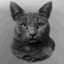

In [281]:
sparkle_bits=message_2_bit_array(image_bytes,mode=None)
spark_array=bitarray2imgarr(sparkle_bits,imgshape=(64,64),bit=5,color=1).squeeze()
len(sparkle_bits)
Image.fromarray(spark_array)